In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv("Household_power_consumption.csv")
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


### Sub_metering_4 is target variable 

In [23]:
df.shape

(2075259, 9)

## Let us consider only 10000 Data points for checking building our Decision Tree

In [24]:
df = df.iloc[:10000,:]

In [25]:
df.shape

(10000, 9)

In [26]:
# Removing the null values
df.dropna(inplace= True)

In [27]:
df.isnull().sum()

datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Sub_metering_4           0
dtype: int64

In [28]:
df.columns

Index(['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Sub_metering_4'],
      dtype='object')

In [29]:
for features in df.columns:
    print(features,df[features].unique())

datetime ['2006-12-16 17:24:00' '2006-12-16 17:25:00' '2006-12-16 17:26:00' ...
 '2006-12-23 16:01:00' '2006-12-23 16:02:00' '2006-12-23 16:03:00']
Global_active_power [4.216 5.36  5.374 ... 4.958 4.932 4.658]
Global_reactive_power [0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.20

In [31]:
#dropping datetime column
df.drop("datetime",axis = 1,inplace =True)

In [32]:
df.shape

(9998, 8)

In [50]:
## Let us split the data into independent and dependent variable
X= df.iloc[:100,:-1]
y= df.iloc[:100,-1]

In [51]:
print(X.shape)
y.shape

(100, 7)


(100,)

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
Regressor = DecisionTreeRegressor()

In [53]:
Regressor.fit(X,y)

DecisionTreeRegressor()

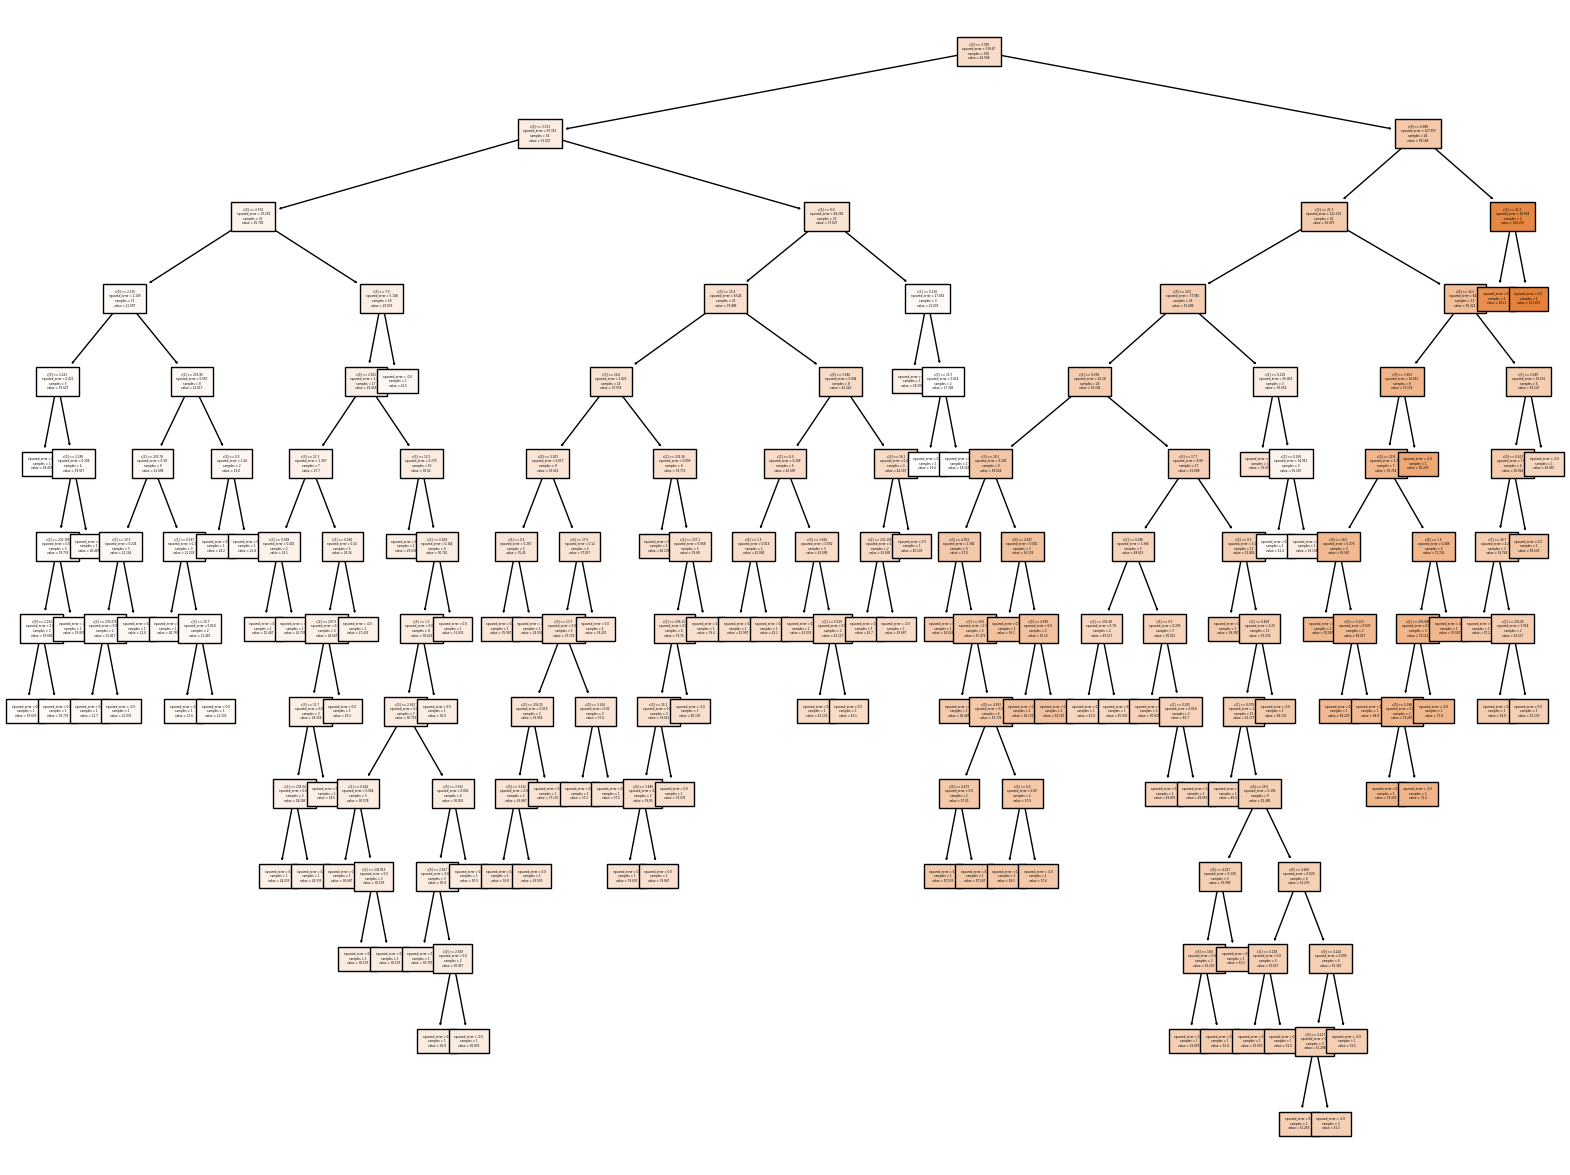

In [57]:
plt.figure(figsize =(20,15))
tree.plot_tree(Regressor,filled = True,fontsize = 2)
plt.show()